# Pandas Test - Real life exercise

In [4]:
import pandas as pd
import numpy as np

For visualizations:

In [5]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [6]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
286039,2022-week_02,AD06X8W8YQ,Search Million Culture,DE,yes,NaN,Qality,DNNQ
105032,2021-week_40,AD007XR8IO,Bizanga,GB,yes,NaN,Yield,DNNY
157188,2021-week_43,AD08HVXZW8,Extreme DA,US,yes,NaN,Yield,DNNY
211457,2021-week_47,AD08C7S7VR,RelayFoods,JP,yes,NaN,Qality,UserPopQ
131878,2021-week_42,AD07D6P8CD,Search Million Culture,GB,yes,NaN,Qality,UserPopQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1.  Add a column with the sample year
1.  Add a column with the sample quarter (google how to)
1.  Add a new success column with values 1 and 0 for yes and no 
1.  Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

## Answers

### Data Modifications

##### Answer Q1

In [7]:
sampleYear=ad_recs_annotated.week_id.str[:4]
ad_recs_annotated['sample_year']=sampleYear

In [8]:
ad_recs_annotated['sample_year'] = ad_recs_annotated['sample_year'].astype(int)

##### Answer Q3

In [9]:
#3.
ad_recs_annotated['Success']=np.where(ad_recs_annotated['is_success']!= 'yes', 0, 1)

##### Answer Q2

In [10]:
#2. adding Quarter
sampleWeek = ad_recs_annotated.week_id.str[-2:]
sampleWeek
ad_recs_annotated['sample_week']=sampleWeek
ad_recs_annotated['sample_week'] = ad_recs_annotated['sample_week'].astype(int)
ad_recs_annotated['sample_quarter'] = ((ad_recs_annotated['sample_week']-1) // 13) + 1

##### Answer Q4

In [11]:
#4.
ad_recs_annotated['severity']=np.where(ad_recs_annotated['is_sever'].isnull,False,ad_recs_annotated['is_sever'] )

##### Answer Q5

In [12]:
ad_recs_annotated['is_sever'].isnull().sum()

304195

In [13]:
ad_recs_annotated['severity'].isnull().sum()

0

##### Answer Q6

In [14]:
#colnames = ad_recs_annotated.columns
#colnames[4] = colnames[4].title()
#colnamedf.Column1.str.title()




#ad_recs_annotated.is_success.str.capitalize()
ad_recs_annotated.is_success=ad_recs_annotated.is_success.str.capitalize()
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False


### Subset selection

##### Answer Q1

In [15]:
#Solutions- SUBSET SELECTION classwork 
#1

request_id = ad_recs_annotated.loc[(ad_recs_annotated['region'] == 'US')]
request_id.count()
request_id.sample(20)
ad_recs_annotated['region'].value_counts()

ad_recs_annotated.query('region == "US"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
10382,2021-week_33,AD078HYGXW,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,1,33,3,False
10383,2021-week_33,AD08NAPQ8Q,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,1,33,3,False
10384,2021-week_33,AD088PHT7F,Tab Solutions,US,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
10385,2021-week_33,AD07M8YV88,Fancy,US,Yes,NaN,Qality,ManualQ,2021,1,33,3,False
10386,2021-week_33,AD08N8T9Y8,Fancy,US,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False


##### Answer Q2

In [16]:
#2

request_successful_us = ad_recs_annotated.loc[(ad_recs_annotated['region'] == 'US') &
              (ad_recs_annotated['is_success']=='Yes')]


request_successful_us['is_success'].value_counts()
request_successful_us['region'].value_counts()

request_successful_us_2 = ad_recs_annotated.query('region == "US" and is_success=="Yes"')

request_successful_us_2

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
10382,2021-week_33,AD078HYGXW,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,1,33,3,False
10383,2021-week_33,AD08NAPQ8Q,Tab Solutions,US,Yes,NaN,Qality,ManualQ,2021,1,33,3,False
10384,2021-week_33,AD088PHT7F,Tab Solutions,US,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
10385,2021-week_33,AD07M8YV88,Fancy,US,Yes,NaN,Qality,ManualQ,2021,1,33,3,False
10386,2021-week_33,AD08N8T9Y8,Fancy,US,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False


##### Answer Q3

In [17]:
#3

request_successful_us_52 = ad_recs_annotated.loc[(ad_recs_annotated['region'] == 'US') &
              (ad_recs_annotated['is_success']=='Yes') & (ad_recs_annotated['sample_week']==52)]


request_successful_us_52

request_successful_us_52_2 = ad_recs_annotated.query('region == "US" and is_success=="Yes" and sample_week==52')
request_successful_us_52_2

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
369790,2022-week_52,AD08Z8NXPM,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False
369791,2022-week_52,AD08X88DRM,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
369792,2022-week_52,AD08JYRL78,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
369794,2022-week_52,AD07J88QWJ,Tab Solutions,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False
369795,2022-week_52,AD088D88YD,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False


##### Answer Q4

In [18]:
#4
ad_recs_annotated['rec_provider'].value_counts()

request_provider_4 = ad_recs_annotated.loc[(ad_recs_annotated['rec_provider'] == 'UserPopQ')|
                                          (ad_recs_annotated['rec_provider'] == 'DDNQ') |
                                          (ad_recs_annotated['rec_provider'] == 'RRNY')  
                                          ]
request_provider_DDNQ = ad_recs_annotated.loc[
                                          (ad_recs_annotated['rec_provider'] == 'DDNQ') 
                                          ]

request_provider_DNNY = ad_recs_annotated.loc[
                                          (ad_recs_annotated['rec_provider'] == 'DNNY') 
                                          ]

request_provider_DDNQ['rec_provider'].value_counts()
#request_provider_4['rec_provider'].value_counts()
#ad_recs_annotated['rec_provider'].value_counts()
#request_provider_4_2=
#DDNQ, RRNY and UserPopQ 
#DNNY                  45116
#DNNQ                 117424
#UserPopQ              69937

Series([], Name: rec_provider, dtype: int64)

In [19]:
ad_recs_annotated['rec_provider'].value_counts()
ddnq_list = ad_recs_annotated.loc[ad_recs_annotated['rec_provider'] == 'DDNQ']
ddnq_list


request_provider_4_2 = ad_recs_annotated.query('rec_provider == "DDNQ" or rec_provider == "DNNY" or rec_provider == "UserPopQ"')
request_provider_4_2['rec_provider'].value_counts()

UserPopQ    69937
DNNY        45116
Name: rec_provider, dtype: int64

##### Answer Q5

In [20]:
# 5

ad_recs_annotated[(ad_recs_annotated.rec_provider =='RuleBased')].sum()
ad_recs_annotated[(ad_recs_annotated.rec_provider =='RuleBased')].count()

week_id                182
ad_id                  182
requester              182
region                 182
is_success             182
is_sever                 6
recommendation_type    182
rec_provider           182
sample_year            182
Success                182
sample_week            182
sample_quarter         182
severity               182
dtype: int64

In [21]:
ad_recs_annotated[(ad_recs_annotated.rec_provider =='RuleBased')].sum()
rec_provider_RuleBased_2 = ad_recs_annotated.query('rec_provider == "RuleBased"')
rec_provider_RuleBased_2

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
4981,2021-week_33,AD08TLNPWT,Search Million Culture,GB,Yes,NaN,Qality,RuleBased,2021,1,33,3,False
7773,2021-week_33,AD08G8CNPP,Search Million Culture,IN,Yes,NaN,Qality,RuleBased,2021,1,33,3,False
7859,2021-week_33,AD08KWSHP8,Search Million Culture,IN,Yes,NaN,Qality,RuleBased,2021,1,33,3,False
10766,2021-week_33,AD088KL8FS,Search Million Culture,US,Yes,NaN,Qality,RuleBased,2021,1,33,3,False
10847,2021-week_33,AD07X7L98N,Sensor Tower,US,Yes,NaN,Qality,RuleBased,2021,1,33,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354581,2022-week_06,AD09FG9RYG,Search Million Culture,US,Yes,NaN,Qality,RuleBased,2022,1,6,1,False
355195,2022-week_06,AD098V88H7,Fry Multimedia,US,Yes,NaN,Qality,RuleBased,2022,1,6,1,False
362343,2022-week_52,AD08688RQH,Search Million Culture,GB,Yes,NaN,Qality,RuleBased,2022,1,52,4,False
362747,2022-week_52,AD08CDVZAH,RelayFoods,GB,Yes,NaN,Qality,RuleBased,2022,1,52,4,False


##### Answer Q6

In [22]:
#6
rec_provider_RuleBased_1=ad_recs_annotated.loc[(ad_recs_annotated.sample_year ==2021)]
rec_provider_RuleBased_2 = ad_recs_annotated.query('sample_year == 2021')
rec_provider_RuleBased_1
rec_provider_RuleBased_2

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271610,2021-week_51,AD00NOMUAV,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,1,51,4,False
271611,2021-week_51,AD078X7888,Extreme DA,US,Yes,NaN,Yield,RuleBasedY,2021,1,51,4,False
271612,2021-week_51,AD07G7MRZT,Tab Solutions,US,Yes,NaN,Qality,XGBQ,2021,1,51,4,False
271613,2021-week_51,AD00008Z6L,Tab Solutions,US,Yes,NaN,Qality,DNNQ,2021,1,51,4,False


In [23]:
rec_provider_RuleBased_1.sample_year.value_counts()

2021    271615
Name: sample_year, dtype: int64

##### Answer Q7

In [24]:
#7 Select the reqeusts from week 30 to week 40 - How many are there?
sample_week_3040=ad_recs_annotated.loc[(ad_recs_annotated.sample_week >= 30) & (ad_recs_annotated.sample_week <= 40)]
sample_week_3040_2 = ad_recs_annotated.query('sample_week >= 30 & sample_week <= 40')


In [25]:
sample_week_3040.count()
sample_week_3040_2.count()

week_id                115051
ad_id                  115051
requester              115051
region                 115051
is_success             115051
is_sever                21874
recommendation_type    115051
rec_provider           115051
sample_year            115051
Success                115051
sample_week            115051
sample_quarter         115051
severity               115051
dtype: int64

In [26]:
sample_week_3040
sample_week_3040_2

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115046,2021-week_40,AD07XH8N9W,Sensor Tower,US,Yes,NaN,Qality,DNNQ,2021,1,40,4,False
115047,2021-week_40,AD097JK9F8,Extreme DA,US,Yes,NaN,Yield,RNNY,2021,1,40,4,False
115048,2021-week_40,AD086WDR8S,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,1,40,4,False
115049,2021-week_40,AD07J897RY,Sensor Tower,US,Yes,NaN,Yield,DNNY,2021,1,40,4,False


##### Answer Q8

In [27]:
# 8 Select all the data that comes from the most popular Ad
ad_recs_annotated.ad_id.value_counts()
#ad_recs_annotated['ad_id'].values
#popAD_1=ad_recs_annotated.loc[(ad_recs_annotated.ad_id)]
#popAD_1 = ad_recs_annotated.query('sample_week >= 30 & sample_week <= 40')

AD07PFFMP9    247
AD098SWYF6    239
AD08C8RR8J    138
AD0886VY87     99
AD08888888     96
             ... 
AD07Y8JSHJ      1
AD0888J7AO      1
AD087G7SHR      1
AD086QCZGJ      1
AD08FWNFDO      1
Name: ad_id, Length: 300727, dtype: int64

##### Answer Q9

In [28]:
# 9 Select all the data that comes from the least popular provider
#the least popular provider is:...

ad_recs_annotated.rec_provider.value_counts().min
#UserPopSelectionY         = 21
minprovider=ad_recs_annotated.loc[(ad_recs_annotated.rec_provider =='UserPopSelectionY')]
minprovider

minprovider_2 = ad_recs_annotated.query('rec_provider == "UserPopSelectionY"')
minprovider_2

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352714,2022-week_06,AD098CXHRF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352738,2022-week_06,AD0086GLW0,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352740,2022-week_06,AD08QMJ888,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352745,2022-week_06,AD07H9GM98,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,6,1,False
352803,2022-week_06,AD09G9YKC8,MoJoe Brewing Company,JP,No,False,Yield,UserPopSelectionY,2022,0,6,1,False


##### Answer Q10

In [29]:
#10 Select the data in which is_sever is None. How big is it?
is_server_null_1=ad_recs_annotated.loc[(ad_recs_annotated.is_sever.isnull())]

ad_recs_annotated['is_sever'].isnull().sum()
is_server_null_1


#is_server_null_2 = ad_recs_annotated.query('is_sever =! is_sever')
#is_server_null_2

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False


##### Answer Q11

In [30]:
#11 Select the data in which the requester is a 3 word company

ad_recs_annotated['requester_list_of_words'] = ad_recs_annotated['requester'].str.split(' ', n=-1, expand=False)
ad_recs_annotated['requester_length_list']=ad_recs_annotated['requester_list_of_words'].str.len()
three_words_requester=ad_recs_annotated.loc[(ad_recs_annotated.requester_length_list ==3)]

three_words_requester

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity,requester_list_of_words,requester_length_list
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False,"[MoJoe, Brewing, Company]",3
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False,"[Search, Million, Culture]",3
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,1,52,4,False,"[MoJoe, Brewing, Company]",3
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,1,52,4,False,"[MoJoe, Brewing, Company]",3
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[MoJoe, Brewing, Company]",3
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False,"[Search, Million, Culture]",3


##### Answer Q12

In [31]:
#12 Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it

ad_recs_annotated['requester_list_of_words'] = ad_recs_annotated['requester'].str.split(' ', n=-1, expand=False)
ad_recs_annotated['requester_length_list']=ad_recs_annotated['requester_list_of_words'].str.len()


ad_recs_annotated['as_id_six_substr'] = ad_recs_annotated['ad_id'].str.contains('6', regex=False)
ad_recs_annotated
three_words_requester
q11=ad_recs_annotated.loc[(ad_recs_annotated.requester_length_list ==3) & (ad_recs_annotated.as_id_six_substr ==True)]
q11

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity,requester_list_of_words,requester_length_list,as_id_six_substr
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False,"[MoJoe, Brewing, Company]",3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,1,52,4,False,"[MoJoe, Brewing, Company]",3,True
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[MoJoe, Brewing, Company]",3,True
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[MoJoe, Brewing, Company]",3,True
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[MoJoe, Brewing, Company]",3,True


##### Answer Q13

In [32]:
#13 Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
ad_recs_annotated['requester_list_of_words'] = ad_recs_annotated['requester'].str.split(' ', n=-1, expand=False)
ad_recs_annotated['requester_length_list']=ad_recs_annotated['requester_list_of_words'].str.len()
ad_recs_annotated['ad_it_list_of_num']=ad_recs_annotated['ad_id'].str.extract('(\d+)')
ad_recs_annotated


def multiply_num(listx):
     res = [int(x) for x in str(listx)]
     result=1
     for number in res:
        result  = result*number
     return  result  

# import numpy
# ad_recs_annotated['ad_id_multiplication_result'] = numpy.prod(ad_recs_annotated.ad_it_list_of_num)

ad_recs_annotated['ad_id_multiply_result'] = ad_recs_annotated['ad_it_list_of_num'].astype(int).apply(multiply_num)

ad_recs_annotated

# ad_recs_annotated
# three_words_requester
# q11=ad_recs_annotated.loc[(ad_recs_annotated.requester_length_list ==3) & (ad_recs_annotated.as_id_six_substr ==True)]
# q11


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity,requester_list_of_words,requester_length_list,as_id_six_substr,ad_it_list_of_num,ad_id_multiply_result
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,False,0088,64
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False,"[MoJoe, Brewing, Company]",3,False,07,7
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True,08,8
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True,89608808,0
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True,07,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[Extreme, DA]",2,False,08,8
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False,[Fancy],1,False,07,7
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[Extreme, DA]",2,True,096,54
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False,[RelayFoods],1,False,08,8


### Analysis

##### Answer Q1

In [33]:
#1. How many weeks available in the data? Are there any missing weeks? 

ad_recs_annotated.week_id.nunique() #26
ad_recs_annotated.week_id.min #week33 in 2021
ad_recs_annotated.week_id.max #week 52 in 2022
# supposed to be 20 (2021) +52 (2022) = total 72 uniqe weeks

<bound method NDFrame._add_numeric_operations.<locals>.max of 0         2021-week_33
1         2021-week_33
2         2021-week_33
3         2021-week_33
4         2021-week_33
              ...     
373783    2022-week_52
373784    2022-week_52
373785    2022-week_52
373786    2022-week_52
373787    2022-week_52
Name: week_id, Length: 373788, dtype: object>

##### Answer Q2

In [34]:
#2 How many regions available in the data? Are there any missing weeks per region?
ad_recs_annotated.region.nunique() #26

#ad_recs_annotated.week_id.min #week33 in 2021
#ad_recs_annotated.week_id.max #week 52 in 2022

5

In [35]:
ad_recs_annotated.groupby(['region']).week_id.value_counts().sort_values()

#ad_recs_annotated.week_id.values
#grouped_by_region.size().sort_values(ascending=False).head()

region  week_id     
JP      2021-week_41    1573
        2021-week_49    1577
        2022-week_03    1578
        2021-week_35    1580
        2022-week_04    1586
                        ... 
US      2021-week_42    4004
        2021-week_34    4006
        2022-week_01    4009
        2021-week_48    4010
        2022-week_02    4016
Name: week_id, Length: 129, dtype: int64

##### Answer Q3

In [36]:
#3 How many ads are being sent to annotation in each region per week?
ad_recs_annotated.groupby(['region','week_id']).size().sort_values()

#.ad_id.value_counts().sort_values()

#.value_counts().sort_values()

region  week_id     
JP      2021-week_41    1573
        2021-week_49    1577
        2022-week_03    1578
        2021-week_35    1580
        2022-week_04    1586
                        ... 
US      2021-week_42    4004
        2021-week_34    4006
        2022-week_01    4009
        2021-week_48    4010
        2022-week_02    4016
Length: 129, dtype: int64

##### Answer Q4

In [37]:
#4 How many None values are there in is_sever column? 

ad_recs_annotated.groupby(['is_sever'],dropna=False).size()
#df.groupby('b', dropna=False).sum()
#filter(ad_recs_annotated.is_sever.isnull())



is_sever
False     24904
True      44689
NaN      304195
dtype: int64

In [38]:
is_server_null_1=ad_recs_annotated.loc[(ad_recs_annotated.is_sever.isnull())]

is_server_null_1

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,Success,sample_week,sample_quarter,severity,requester_list_of_words,requester_length_list,as_id_six_substr,ad_it_list_of_num,ad_id_multiply_result
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,False,0088,64
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,1,33,3,False,"[MoJoe, Brewing, Company]",3,False,07,7
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True,08,8
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True,89608808,0
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,1,33,3,False,"[Search, Million, Culture]",3,True,07,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[Extreme, DA]",2,False,08,8
373784,2022-week_52,AD07C8XSMN,Fancy,US,Yes,NaN,Qality,RNNQ,2022,1,52,4,False,[Fancy],1,False,07,7
373785,2022-week_52,AD096LRR88,Extreme DA,US,Yes,NaN,Yield,DNNY,2022,1,52,4,False,"[Extreme, DA]",2,True,096,54
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,Yes,NaN,Qality,DNNQ,2022,1,52,4,False,[RelayFoods],1,False,08,8


##### Answer Q5

In [39]:
#5 Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad_recs_annotated.groupby(['region','week_id']).ad_id.value_counts().sort_values(ascending=False)



region  week_id       ad_id     
IN      2021-week_40  AD098SWYF6    81
GB      2021-week_47  AD08C8RR8J    70
                      AD07QS8VCL    58
                      AD00IGCC8G    56
                      AD098C6SNV    55
                                    ..
        2022-week_02  AD0080OJXM     1
                      AD0080MMDF     1
                      AD0080FHVE     1
                      AD0080EGQ7     1
US      2022-week_52  AD98889688     1
Name: ad_id, Length: 359619, dtype: int64

##### Answer Q6.1

In [40]:
#6 Are there ads that are being sent in more than one week?
#6.1 - Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
#6.2 - What are the weeks that the ad from above was sent in?
#6.3 - Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

#6.1
ad_recs_annotated.groupby(['ad_id']).week_id.nunique().sort_values(ascending=False)


ad_id
AD07PFFMP9    26
AD098ZJV6Z    26
AD079VP6DH    26
AD08697N88    25
AD88888888    25
              ..
AD07KN8K7C     1
AD07KN8K8M     1
AD07KN8M88     1
AD07KN8M8J     1
AD07ZFY86L     1
Name: week_id, Length: 300727, dtype: int64

##### Answer Q6.2

In [41]:
#6.2 filtering on AD AD07PFFMP9
data_ad_AD07PFFMP9 =ad_recs_annotated.loc[(ad_recs_annotated.ad_id =='AD07PFFMP9')]
data_ad_AD07PFFMP9.groupby(['week_id']).size()

week_id
2021-week_33     2
2021-week_34     2
2021-week_35     3
2021-week_36     2
2021-week_37     2
2021-week_38     7
2021-week_39     5
2021-week_40    36
2021-week_41    22
2021-week_42    18
2021-week_43    19
2021-week_44     8
2021-week_45    13
2021-week_46    13
2021-week_47     6
2021-week_48    11
2021-week_49     7
2021-week_50     8
2021-week_51     4
2022-week_01     7
2022-week_02     7
2022-week_03    15
2022-week_04     5
2022-week_05     6
2022-week_06     3
2022-week_52    16
dtype: int64

##### Answer Q6.3

In [42]:
#6.3

ad_recs_annotated.groupby(['ad_id','week_id']).size().sort_values()

ad_id       week_id     
AD00000088  2021-week_37     1
AD08DC7ZX8  2022-week_02     1
AD08DC7888  2021-week_45     1
            2021-week_33     1
AD08DC008G  2021-week_36     1
                            ..
AD098C6SNV  2021-week_47    55
AD00IGCC8G  2021-week_47    56
AD07QS8VCL  2021-week_47    58
AD08C8RR8J  2021-week_47    70
AD098SWYF6  2021-week_40    81
Length: 358763, dtype: int64

##### Answer Q7

In [43]:
#7 When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?

is_server_null_1=ad_recs_annotated.loc[(ad_recs_annotated.is_sever.isnull())]
is_server_null_1.groupby('is_success').size()

is_success
No          6
Yes    304189
dtype: int64

##### Answer Q8

In [44]:
#8 Per each region, What is the Quality/Yield traffic proportion WoW?
ad_recs_annotated.groupby(['region','week_id','recommendation_type' ]).size().sort_values()

region  week_id       recommendation_type
JP      2021-week_42  Yield                    76
        2021-week_44  Yield                   100
        2021-week_43  Yield                   112
        2022-week_04  Yield                   132
        2022-week_05  Yield                   135
                                             ... 
GB      2022-week_06  Qality                 2888
US      2022-week_02  Yield                  2910
        2021-week_46  Yield                  2944
        2022-week_01  Yield                  2987
        2021-week_47  Yield                  3130
Length: 258, dtype: int64

##### Answer Q9

In [45]:
#9 How many different reqeusters are there?
ad_recs_annotated.groupby(['week_id','ad_id','requester','region','is_success','is_sever','recommendation_type','rec_provider']).size()
#.nunique().sort_values(ascending=False)



week_id       ad_id       requester               region  is_success  is_sever  recommendation_type  rec_provider
2021-week_33  AD0000AIRX  Search Million Culture  GB      No          True      Qality               XGBQ            1
              AD0000C9HG  RelayFoods              JP      No          True      Qality               DNNQ            1
              AD0000YTGG  MoJoe Brewing Company   JP      No          True      Yield                UserPopY        1
              AD00060YV9  RelayFoods              GB      No          True      Qality               DNNQ            1
              AD00068Q7L  Bizanga                 GB      No          True      Yield                UserPopY        1
                                                                                                                    ..
2022-week_52  AD89688887  MoJoe Brewing Company   DE      No          False     Yield                BooksY          1
              AD89868887  aPriori Technologies    GB 

##### Answer Q10

In [46]:
#10 Which are the top 5 requesters per region?
ad_recs_annotated.groupby(['region']).requester.value_counts().sort_values(ascending=False)

ad_recs_annotated.groupby(['region']).requester.value_counts().nlargest(5)


region  requester             
US      Extreme DA                57215
IN      Puentes Company           29427
GB      Search Million Culture    28002
JP      RelayFoods                24574
DE      Search Million Culture    23657
Name: requester, dtype: int64

##### Answer Q11

In [47]:
#11 Which are the different rec_proivders?

#rec_provider
ad_recs_annotated.groupby(['rec_provider']).size()

rec_provider
BooksQ                 1720
BooksY                 4150
DNNQ                 117424
DNNY                  45116
ManualQ               13844
ManualY                1982
RNNQ                  20983
RNNY                  12732
RuleBased               182
RuleBasedY            28154
UserPopQ              69937
UserPopSelectionQ      2417
UserPopSelectionY        21
UserPopY              38600
XGBQ                  12250
XGBY                   4276
dtype: int64

##### Answer Q12

In [48]:
#12 Are there different rec providers per region?
ad_recs_annotated.groupby(['region','rec_provider']).is_success.size()

region  rec_provider     
DE      BooksQ                1353
        BooksY                1257
        DNNQ                 32433
        DNNY                  5417
        ManualQ                968
        ManualY                605
        RuleBasedY            1614
        UserPopQ             15179
        UserPopY              3351
GB      DNNQ                 39675
        DNNY                  7273
        ManualQ               2154
        ManualY                553
        RNNQ                 11369
        RNNY                  1548
        RuleBased               40
        RuleBasedY            1849
        UserPopQ              6781
        UserPopY              1642
        XGBQ                  9136
        XGBY                   964
IN      ManualQ               5293
        ManualY                225
        RuleBased                7
        RuleBasedY           14107
        UserPopQ             38225
        UserPopY             25297
JP      DNNQ                 

##### Answer Q13

In [49]:
#13 Are there different rec providers per rec type?
ad_recs_annotated.groupby(['recommendation_type','rec_provider']).size()

recommendation_type  rec_provider     
Qality               BooksQ                 1720
                     DNNQ                 117424
                     ManualQ               10220
                     ManualY                1439
                     RNNQ                  20983
                     RuleBased               182
                     UserPopQ              69937
                     UserPopSelectionQ      2417
                     XGBQ                  12250
Yield                BooksY                 4150
                     DNNY                  45116
                     ManualQ                3624
                     ManualY                 543
                     RNNY                  12732
                     RuleBasedY            28154
                     UserPopSelectionY        21
                     UserPopY              38600
                     XGBY                   4276
dtype: int64

##### Answer Q14

In [50]:
#14 What are the notation rules distinguishing between quality vs yielding providers?
ad_recs_annotated.groupby(['recommendation_type']).size()

recommendation_type
Qality    236572
Yield     137216
dtype: int64

##### Answer Q15

In [75]:
#15 Which is the most successful region of operation?

ad_recs_annotated.groupby(['region']).size()


#ad_recs_annotated.groupby(['region']).requester.value_counts().sort_values(ascending=False)

#ad_recs_annotated.groupby(['region']).requester.value_counts().nlargest(5)


region
DE     62177
GB     82984
IN     83154
JP     41627
US    103846
dtype: int64

##### Answer Q16

In [53]:
#16 Which is the most successful rec provider per each region?
#ad_recs_annotated.groupby(['region','rec_provider']).is_success.size()
#ad_recs_annotated.groupby(['region','rec_provider']).Success.count().groupby(['region','rec_provider']).first()
ad_recs_annotated.groupby(['region','rec_provider']).Success.count().sort_values(ascending=False)

region  rec_provider     
GB      DNNQ                 39675
IN      UserPopQ             38225
DE      DNNQ                 32433
US      DNNY                 28567
IN      UserPopY             25297
JP      DNNQ                 24574
US      DNNQ                 20742
DE      UserPopQ             15179
IN      RuleBasedY           14107
GB      RNNQ                 11369
US      RNNY                 11184
        RuleBasedY            9957
        RNNQ                  9614
GB      XGBQ                  9136
JP      UserPopQ              7930
GB      DNNY                  7273
US      UserPopY              6933
GB      UserPopQ              6781
DE      DNNY                  5417
IN      ManualQ               5293
US      ManualQ               4732
JP      DNNY                  3859
DE      UserPopY              3351
US      XGBY                  3312
        XGBQ                  3114
        BooksY                2893
JP      UserPopSelectionQ     2417
GB      ManualQ              

##### Answer Q21


In [96]:
#Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
ad_recs_annotated.groupby(['region','recommendation_type','is_success', 'is_sever']).size()






region  recommendation_type  is_success  is_sever
DE      Qality               No          False       3614
                                         True        6108
                             Yes         False          3
                                         True           3
        Yield                No          False        876
                                         True         952
GB      Qality               No          False       2870
                                         True        7514
                             Yes         True           2
        Yield                No          False        677
                                         True        2413
IN      Qality               No          False       4284
                                         True        3635
                             Yes         False          1
        Yield                No          False       3783
                                         True        8096
                      

In [121]:
ad_recs_annotated21 = ad_recs_annotated.groupby(['region','recommendation_type','is_success']).is_sever.value_counts(normalize=True).unstack('is_success')['No'].unstack('is_sever')[True]
ad_recs_annotated21['sample_size']=ad_recs_annotated.groupby(['region','recommendation_type','is_success']).is_sever.value_counts().unstack('is_success')['No'].unstack('is_sever')[True]

ad_recs_annotated21.reset_index()

,region,recommendation_type,True
0,DE,Qality,0.628266
1,DE,Yield,0.520788
2,GB,Qality,0.723613
3,GB,Yield,0.780906
4,IN,Qality,0.459023
5,IN,Yield,0.681539
6,JP,Qality,0.704606
7,JP,Yield,0.464267
8,US,Qality,0.737845
9,US,Yield,0.598339


##### Answer Q24

In [106]:
#Present WoW table/graph with success rate and CI (see image below) per region and rec provider

ad_recs_annotated24 = ad_recs_annotated.groupby(['week_id','region','rec_provider']).is_success.value_counts(normalize=True).unstack('is_success')['Yes'].rename('success_rate')
ad_recs_annotated24.reset_index()


,week_id,region,rec_provider,success_rate
0,2021-week_33,DE,BooksQ,0.838235
1,2021-week_33,DE,BooksY,0.975000
2,2021-week_33,DE,DNNQ,0.827804
3,2021-week_33,DE,DNNY,0.906593
4,2021-week_33,DE,ManualQ,0.865385
...,...,...,...,...
1207,2022-week_52,US,RuleBasedY,0.521951
1208,2022-week_52,US,UserPopQ,0.759259
1209,2022-week_52,US,UserPopY,0.650943
1210,2022-week_52,US,XGBQ,0.763441


##### Answer Q25

In [117]:
#Which are the requester to which we succeed the most?
#ad_recs_annotated.groupby(['requester', 'is_success']).is_success.value_counts
ad_recs_annotated.groupby(['requester']).is_success.value_counts().sort_values(ascending=False)

requester               is_success
Search Million Culture  Yes           70331
RelayFoods              Yes           63288
Extreme DA              Yes           47316
Fancy                   Yes           28519
MoJoe Brewing Company   Yes           25436
                                      ...  
Jun Group               No                1
Marketo Japan           Yes               1
Earth Networks          No                1
Metranome               No                1
Derceto                 Yes               1
Name: is_success, Length: 66, dtype: int64

##### Answer Q29

In [122]:
#Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:



### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

Your task is to reconstruct the dataset above. 

In [ ]:
### Visualizations

Produce the following success rate graph per region:

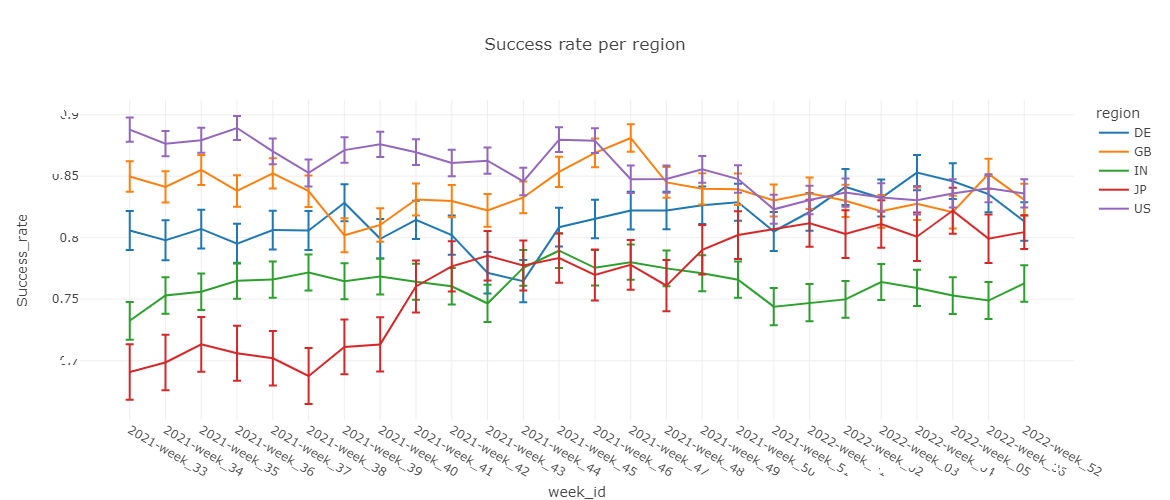

Produce the following requestser proportion graph:

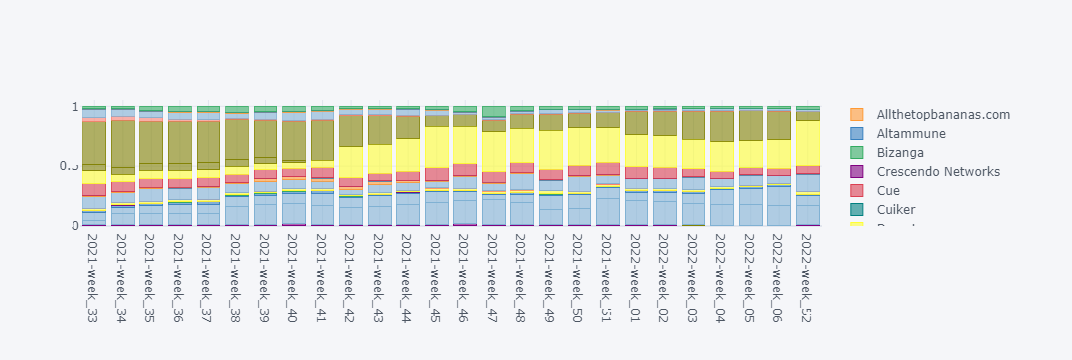

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)